In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('./vgsales_ml.csv')
data.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,2,NES,1985.0,Pltform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996.0,Role_Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data = data[['Name','Rank','Platform','Year','Genre','Publisher']]
data.head()

,Name,Rank,Platform,Year,Genre,Publisher
0,Wii Sports,1,Wii,2006.0,Sports,Nintendo
1,Super Mario Bros.,2,NES,1985.0,Pltform,Nintendo
2,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,5,GB,1996.0,Role_Playing,Nintendo


In [19]:
datadumm = pd.get_dummies(data=data, columns=['Genre'])
datadumm.head()

,Name,Rank,Platform,Year,Publisher,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Pltform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,1,Wii,2006.0,Nintendo,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,2,NES,1985.0,Nintendo,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,3,Wii,2008.0,Nintendo,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,4,Wii,2009.0,Nintendo,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,5,GB,1996.0,Nintendo,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
datadumm2 = pd.get_dummies(data=datadumm, columns=['Platform'])
datadumm2.head()

,Name,Rank,Year,Publisher,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Pltform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,1,2006.0,Nintendo,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,2,1985.0,Nintendo,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,3,2008.0,Nintendo,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,4,2009.0,Nintendo,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,5,1996.0,Nintendo,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
datadumm3 = pd.get_dummies(data=datadumm2, columns=['Name'])
datadumm3.head()

,Rank,Year,Publisher,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Pltform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),Name_.hack//G.U. Vol.3//Redemption,Name_.hack//Infection Part 1,Name_.hack//Link,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,Name_.hack//Quarantine Part 4: The Final Chapter,Name_.hack: Sekai no Mukou ni + Versus,Name_007 Racing,Name_007: Quantum of Solace,Name_007: The World is not Enough,Name_007: Tomorrow Never Dies,Name_1 vs. 100,Name_1/2 Summer +,Name_10 Minute Solution,Name_100 All-Time Favorites,Name_100 Classic Books,Name_100 Classic Games,Name_1000 Cooking Recipes from ELLE à table,Name_1001 Touch Games,Name_101-in-1 Explosive Megamix,Name_101-in-1 Party Megamix Wii,Name_101-in-1 Sports Megamix,Name_101-in-1 Sports Party Megamix,Name_1080°: TenEighty Snowboarding,Name_11eyes: CrossOver,Name_12-Sai. Honto no Kimochi,Name_12-Sai. Koisuru Diary,Name_12Riven: The Psi-Climinal of Integral,Name_15 Days,Name_1701 A.D.,Name_18 Wheeler: American Pro Trucker,Name_18 Wheels of Steel: Extreme Trucker,Name_18 Wheels of Steel: Extreme Trucker 2,Name_187: Ride or Die,Name_1942,Name_2 Games in 1 Double Pack: Hot Wheels Velocity X / Hot Wheels World Race,Name_2 Games in 1 Double Pack: The Incredibles / Finding Nemo: The Continuing Adventures,Name_2 Games in 1: Disney Princess & The Lion King,Name_2 Games in 1: Disney's Brother Bear / The Lion King 1 1/2,Name_2 Games in 1: Sonic Advance & ChuChu Rocket!,Name_2 Games in 1: Sonic Battle & ChuChu Rocket!,Name_2 Games in 1: Sonic Pinball Party & Columns Crown,Name_2 Games in 1: SpongeBob SquarePants: SuperSponge & Rugrats Go Wild,Name_2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,Name_2-in-1 Game Pack: Spider-Man & Spider-Man 2,Name_2002 FIFA World Cup,Name_2010 FIFA World Cup South Africa,Name_2014 FIFA World Cup Brazil,Name_24: The Game,Name_25 to Life,Name_2Xtreme,"Name_3 in 1: Solitaire, Mahjong & Tangram",Name_300: March to Glory,Name_3D Baseball,Name_3D Dot Game Heroes,Name_3D Lemmings,Name_3D Tank Warfare Simulator Panzer Front,Name_3DS Classic Collection,Name_3Xtreme,Name_3rd Super Robot Wars Z Jigoku Hen,Name_3rd Super Robot Wars Z: Tengoku-Hen,Name_4 Elements,Name_4 Game Fun Pack: Monopoly / Boggle / Yahtzee / Battleship,Name_4 Nin uchi Mahjong,Name_40 Winks,Name_428: Fuusa Sareta Shibuya de,Name_4x4 EVO 2,Name_4x4 Evolution,Name_50 Cent: Blood on the Sand,Name_50 Cent: Bulletproof,Name_50 Classic Games,Name_64 de Hakken! Tamagotchi Minna de Tamagotchi World,Name_7 Days to Die,Name_7 Roses: A Darkness Rises,Name_7 Wonders II,Name_7 Wonders of the Ancient World,Name_7 Wonders: Treasures of Seven,Name_7th Dragon,Name_7th Dragon 2020,Name_7th Dragon 2020-II,Name_7th Dragon III Code: VFD,Name_99 no Namida,"Name_999: Nine Hours, Nine Persons, Nine Doors",Name_A Boy and His Blob,Name_A Bug's Life,Name_A Collection of Activision Classic Games for the Atari 2600,Name_A Collection of Classic Games from the Intellivision,Name_A Game of Thrones: Genesis,Name_A Good Librarian Like a Good Shepherd: Library Party,Name_A New Beginning,Name_A Ressha de Gyoukou 2001,Name_A Ressha de Ikou DS,Name_A Vampyre Story,Name_A Witch's Tale,Name_A llI S.V.: A Ressha de Gyoukou 3 Super Version,Name_A-Train,Name_A-Train 6,Name_A-Train: City Simulator,Name_A. IV Evolution: A Ressha de Ikou 4,Name_A.C.E.: Another Century's Episode,Name_A.C.E.: Another Century's Episode 2,Name_A

In [22]:
datadumm4 = pd.get_dummies(data=datadumm3, columns=['Publisher'])
datadumm4.head()

,Rank,Year,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Pltform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),Name_.hack//G.U. Vol.3//Redemption,Name_.hack//Infection Part 1,Name_.hack//Link,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,Name_.hack//Quarantine Part 4: The Final Chapter,Name_.hack: Sekai no Mukou ni + Versus,Name_007 Racing,Name_007: Quantum of Solace,Name_007: The World is not Enough,Name_007: Tomorrow Never Dies,Name_1 vs. 100,Name_1/2 Summer +,Name_10 Minute Solution,Name_100 All-Time Favorites,Name_100 Classic Books,Name_100 Classic Games,Name_1000 Cooking Recipes from ELLE à table,Name_1001 Touch Games,Name_101-in-1 Explosive Megamix,Name_101-in-1 Party Megamix Wii,Name_101-in-1 Sports Megamix,Name_101-in-1 Sports Party Megamix,Name_1080°: TenEighty Snowboarding,Name_11eyes: CrossOver,Name_12-Sai. Honto no Kimochi,Name_12-Sai. Koisuru Diary,Name_12Riven: The Psi-Climinal of Integral,Name_15 Days,Name_1701 A.D.,Name_18 Wheeler: American Pro Trucker,Name_18 Wheels of Steel: Extreme Trucker,Name_18 Wheels of Steel: Extreme Trucker 2,Name_187: Ride or Die,Name_1942,Name_2 Games in 1 Double Pack: Hot Wheels Velocity X / Hot Wheels World Race,Name_2 Games in 1 Double Pack: The Incredibles / Finding Nemo: The Continuing Adventures,Name_2 Games in 1: Disney Princess & The Lion King,Name_2 Games in 1: Disney's Brother Bear / The Lion King 1 1/2,Name_2 Games in 1: Sonic Advance & ChuChu Rocket!,Name_2 Games in 1: Sonic Battle & ChuChu Rocket!,Name_2 Games in 1: Sonic Pinball Party & Columns Crown,Name_2 Games in 1: SpongeBob SquarePants: SuperSponge & Rugrats Go Wild,Name_2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,Name_2-in-1 Game Pack: Spider-Man & Spider-Man 2,Name_2002 FIFA World Cup,Name_2010 FIFA World Cup South Africa,Name_2014 FIFA World Cup Brazil,Name_24: The Game,Name_25 to Life,Name_2Xtreme,"Name_3 in 1: Solitaire, Mahjong & Tangram",Name_300: March to Glory,Name_3D Baseball,Name_3D Dot Game Heroes,Name_3D Lemmings,Name_3D Tank Warfare Simulator Panzer Front,Name_3DS Classic Collection,Name_3Xtreme,Name_3rd Super Robot Wars Z Jigoku Hen,Name_3rd Super Robot Wars Z: Tengoku-Hen,Name_4 Elements,Name_4 Game Fun Pack: Monopoly / Boggle / Yahtzee / Battleship,Name_4 Nin uchi Mahjong,Name_40 Winks,Name_428: Fuusa Sareta Shibuya de,Name_4x4 EVO 2,Name_4x4 Evolution,Name_50 Cent: Blood on the Sand,Name_50 Cent: Bulletproof,Name_50 Classic Games,Name_64 de Hakken! Tamagotchi Minna de Tamagotchi World,Name_7 Days to Die,Name_7 Roses: A Darkness Rises,Name_7 Wonders II,Name_7 Wonders of the Ancient World,Name_7 Wonders: Treasures of Seven,Name_7th Dragon,Name_7th Dragon 2020,Name_7th Dragon 2020-II,Name_7th Dragon III Code: VFD,Name_99 no Namida,"Name_999: Nine Hours, Nine Persons, Nine Doors",Name_A Boy and His Blob,Name_A Bug's Life,Name_A Collection of Activision Classic Games for the Atari 2600,Name_A Collection of Classic Games from the Intellivision,Name_A Game of Thrones: Genesis,Name_A Good Librarian Like a Good Shepherd: Library Party,Name_A New Beginning,Name_A Ressha de Gyoukou 2001,Name_A Ressha de Ikou DS,Name_A Vampyre Story,Name_A Witch's Tale,Name_A llI S.V.: A Ressha de Gyoukou 3 Super Version,Name_A-Train,Name_A-Train 6,Name_A-Train: City Simulator,Name_A. IV Evolution: A Ressha de Ikou 4,Name_A.C.E.: Another Century's Episode,Name_A.C.E.: Another Century's Episode 2,Name_A.C.E.: Ano

In [23]:
data_sample = datadumm4.sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(data_sample)

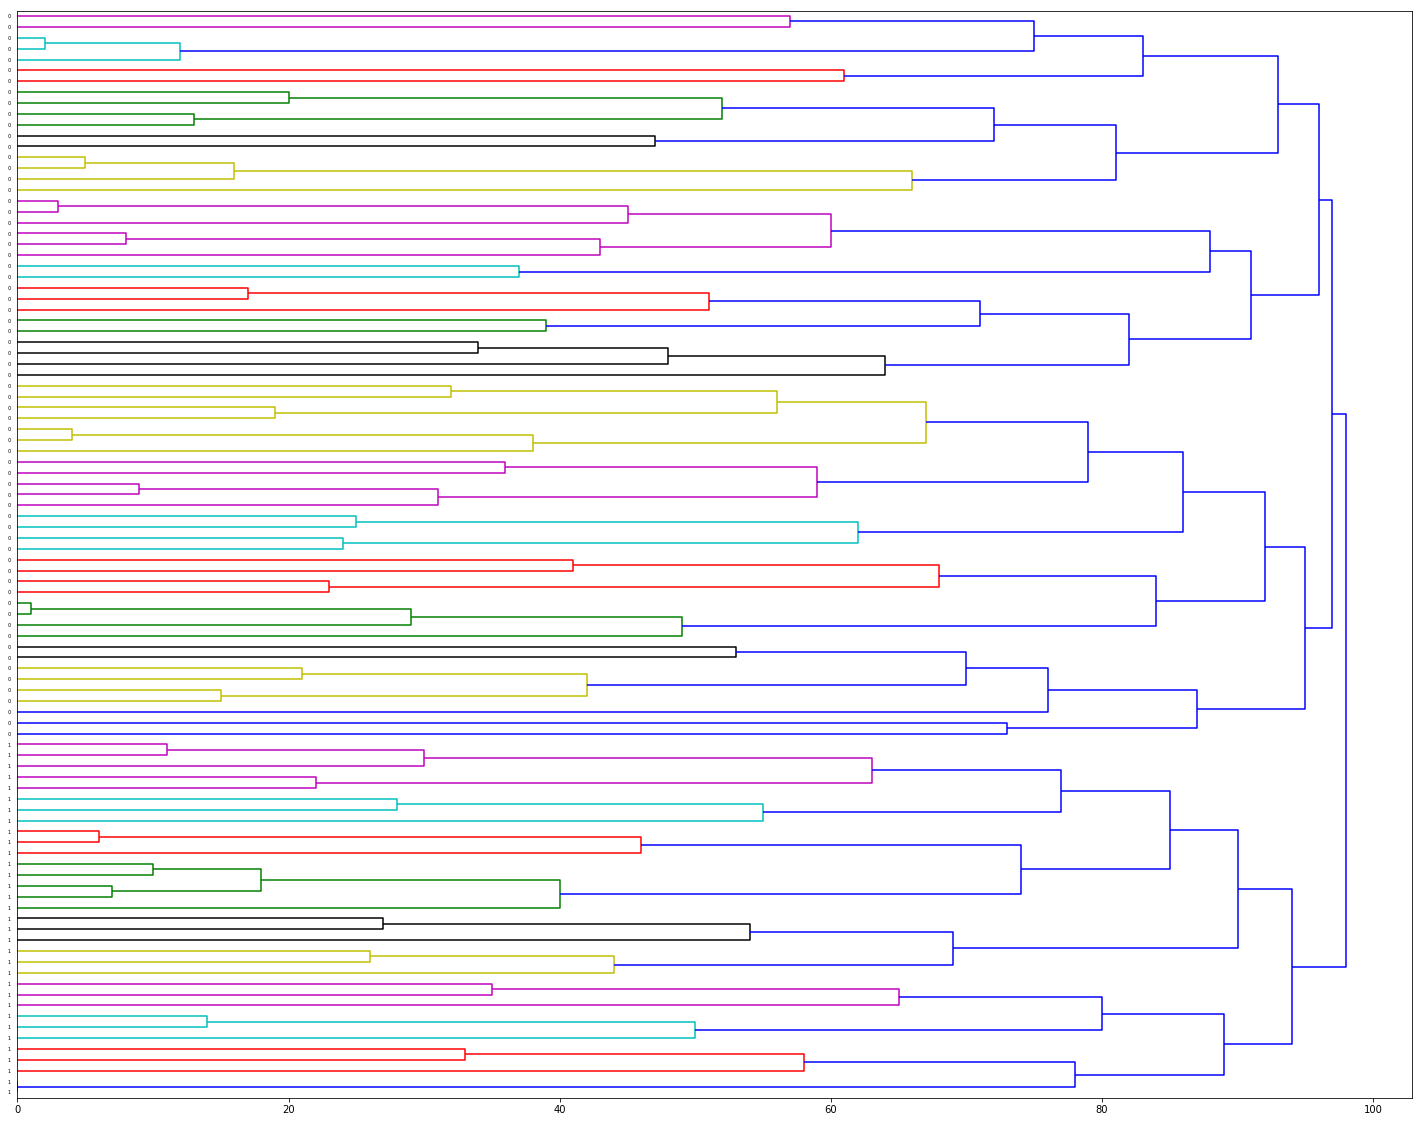

In [35]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, orientation='right')
plt.figure(figsize=(25, 20))    
plot_dendrogram(census_hier, labels=census_hier.labels_)